In [21]:
from matplotlib import pyplot as plt

def make_grid_plot(num_items, cols=3, size=3):
    rows = (num_items + cols - 1)//cols
    cols = min(cols, num_items)
    
    fig, axes = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    axes = axes.flatten() if cols > 1 else [axes]
    
    fig.tight_layout()
    
    return fig, axes

In [5]:
from functools import reduce

sorted_genes = lambda x: set(sorted(x.replace('\'', '').split()))

top_error_genes = {
    'GradientBoostingRegressor': sorted_genes(
        """'GPSM3' 'RAB3IL1' 'RACK1' 'RPL13' 'HIST1H1D' 'RPL10' 'GAS5' 'RPS18'
        'SRSF3' 'CXCR4' 'HSPE1' 'CLIC1' 'SH3BGRL3' 'RPS12' 'BBC3' 'RPL28' 'B2M'
        'SOD1' 'EIF1' 'GZMM' 'LTB' 'S100A6' 'FTH1' 'RAC2' 'PFN1' 'S100A4' 'CD52'
        'LDHA' 'VIM' 'HLA-B' 'ZFAS1' 'CFL1' 'IL32' 'UBB' 'HSP90AB1' 'UBC' 'RPS19'
        'TPT1' 'ENO1' 'GAPDH' 'HSP90AA1' 'PKM' 'TRAF3IP3' 'EMP3' 'PABPC1' 'HCST'
        'ACTB' 'TMSB4X' 'CORO1A' 'TXNIP'"""
    ),
    'LinearSVR': sorted_genes(
        """'HIST1H1C' 'RPS19' 'HMGN2' 'HLA-E' 'HSPE1' 'HLA-B' 'TAF1D' 'TRAF3IP3'
        'UBB' 'CD3E' 'TALDO1' 'S100A4' 'TMBIM4' 'SOD1' 'PPA1' 'CHORDC1' 'EPC1'
        'SQSTM1' 'HSPH1' 'UFC1' 'GZMM' 'SNHG6' 'LTB' 'UBC' 'H1FX' 'CIRBP' 'ST13'
        'IL27RA' 'DNAJB1' 'ADI1' 'RPS27L' 'FTL' 'HSPD1' 'TXNIP' 'BAX' 'LIMD2'
        'HSP90AA1' 'METRN' 'CACYBP' 'STMN1' 'HSP90AB1' 'S100A6' 'ZFAS1'
        'HIST1H1D' 'SRSF5' 'HCST' 'DDX5' 'CORO1A' 'GPSM3' 'EMP3'"""
    ),
    'SVR': sorted_genes(
        """'SNHG12' 'HIST1H1C' 'HLA-B' 'TALDO1' 'SOD1' 'CD3E' 'PPA1' 'NDUFB2' 'BIN2'
        'RPS19' 'HMGN2' 'IL27RA' 'CIRBP' 'SQSTM1' 'ADI1' 'LIMD2' 'DDX5' 'EPC1'
        'HIST1H1D' 'HSPD1' 'SNHG6' 'LTB' 'UFC1' 'TXNIP' 'ZFAS1' 'METRN' 'UBC'
        'TMBIM4' 'ST13' 'CACYBP' 'TRAF3IP3' 'DNAJB1' 'HSPH1' 'HLA-E' 'RPS27L'
        'H1FX' 'S100A4' 'CHORDC1' 'GPSM3' 'GZMM' 'CORO1A' 'HCST' 'HSP90AA1'
        'S100A6' 'EMP3' 'FTL' 'BAX' 'SRSF5' 'HSP90AB1' 'STMN1'"""
    ),
}

error_prone_genes = reduce(lambda y,x: y.intersection(x), top_error_genes.values())

len(error_prone_genes), error_prone_genes

(18,
 {'CORO1A',
  'EMP3',
  'GPSM3',
  'GZMM',
  'HCST',
  'HIST1H1D',
  'HLA-B',
  'HSP90AA1',
  'HSP90AB1',
  'LTB',
  'RPS19',
  'S100A4',
  'S100A6',
  'SOD1',
  'TRAF3IP3',
  'TXNIP',
  'UBC',
  'ZFAS1'})

In [6]:
import pandas as pd

de_train =   pd.read_parquet("de_train.parquet")
raw_de_train =   pd.read_csv("raw_de_train.csv").drop(columns=['Unnamed: 0'])

def column_to_categorical(df, col, col_id='col_id', categories=None):
    df[col] = pd.Categorical(df[col], categories=categories)
    df[col_id] = df[col].cat.codes
    
    return df

raw_de_train = raw_de_train[de_train.columns]
raw_de_train = column_to_categorical(raw_de_train, col='cell_type', col_id='cell_id')
raw_de_train = column_to_categorical(raw_de_train, col='sm_name', col_id='sm_id')

display(de_train)
display(raw_de_train)

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,...,-0.549987,-2.200925,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951
610,NK cells,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,-0.455549,0.188181,0.595734,-0.100299,0.786192,...,-1.236905,0.003854,-0.197569,-0.175307,0.101391,1.028394,0.034144,-0.231642,1.023994,-0.064760
611,T cells CD4+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.338168,-0.109079,0.270182,-0.436586,-0.069476,...,0.077579,-1.101637,0.457201,0.535184,-0.198404,-0.005004,0.552810,-0.209077,0.389751,-0.337082
612,T cells CD8+,Riociguat,LSM-45758,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,False,0.101138,-0.409724,-0.606292,-0.071300,-0.001789,...,0.005951,-0.893093,-1.003029,-0.080367,-0.076604,0.024849,0.012862,-0.029684,0.005506,-1.733112


,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,cell_id,sm_id
0,T regulatory cells,TPCA-1,LSM-1136,NC(=O)Nc1sc(-c2ccc(F)cc2)cc1C(N)=O,False,2.175274,1.219289,2.396227,2.885988,3.384956,...,0.180416,0.755145,1.809688,1.644712,0.701406,0.137341,0.230949,0.179458,5,130
1,NK cells,Dovitinib,LSM-1127,CN1CCN(c2ccc3[nH]c(-c4c(N)c5c(F)cccc5[nH]c4=O)...,False,0.214531,-0.115171,0.326515,0.032289,0.220971,...,-0.108654,-0.063070,0.006721,-0.593161,-0.044022,0.475729,0.356555,-0.038020,2,50
2,T regulatory cells,Tacalcitol,LSM-45518,C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]([C@H](C)CC[C@...,False,0.391257,-0.052922,0.540292,0.718991,1.083183,...,0.089976,-0.000729,0.419802,1.020842,0.367313,0.486345,-0.856723,0.191009,5,132
3,T regulatory cells,Atorvastatin,LSM-5771,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,False,-0.014372,-0.122464,-0.456366,-0.147894,-0.545382,...,0.359806,1.073983,0.356939,-0.029603,-0.528817,0.105138,0.491015,-0.979951,5,14
4,T cells CD8+,MK-5108,LSM-36812,O=C(O)[C@]1(Cc2cccc(Nc3nccs3)n2)CC[C@@H](Oc2cc...,False,0.094873,1.067610,-0.745980,1.083842,0.638504,...,0.147217,0.292313,0.029266,0.330628,1.038142,-0.194884,1.078132,0.057001,4,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,T regulatory cells,Raloxifene,LSM-3425,O=C(c1ccc(OCCN2CCCCC2)cc1)c1c(-c2ccc(O)cc2)sc2...,False,1.080779,0.226991,2.440729,2.581894,1.773980,...,1.351487,2.359651,1.470219,0.866639,0.467307,0.663700,-0.122574,-0.315800,5,113
610,NK cells,Dabrafenib,LSM-6303,CC(C)(C)c1nc(-c2cccc(NS(=O)(=O)c3c(F)cccc3F)c2...,True,-0.161665,0.269009,-1.770091,-0.198444,0.954753,...,-0.589313,-0.660929,0.016530,0.319136,0.299521,-0.383452,0.267828,-1.100267,2,43
611,T regulatory cells,RN-486,LSM-47132,CN1CCN(c2ccc(Nc3cc(-c4cccc(-n5ccc6cc(C7CC7)cc(...,False,-0.304126,0.443651,0.688265,-0.101457,-0.005912,...,-0.211083,-0.495621,-0.233734,1.120530,-0.109096,0.128084,0.313468,-0.512444,5,111
612,NK cells,Doxorubicin,LSM-4062,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,False,0.482294,-1.262924,-0.545405,-0.497739,-0.750201,...,0.337660,0.025025,0.035943,0.691171,0.352091,0.046012,-0.760812,-0.168719,2,51


In [7]:
class Config(object):
    def __init__(self, genes, raw_de_train, clusters=[], fill_holes=False, debug_interest=10):
        self.genes = genes
        self.cell_categories = raw_de_train['cell_type'].cat.categories
        self.sm_categories = raw_de_train['sm_name'].cat.categories
        self.num_genes = len(self.genes)
        self.clusters = clusters if clusters else [self.num_genes]
        self.num_clusters = len(self.clusters)
        self.fill_holes = fill_holes
        self.debug_interest = debug_interest
    
    def __repr__(self):
        return (
            f'\n{self.genes[:5]=} {self.genes[-5:]=}\n'
            f'\n{self.cell_categories=}\n'
            f'\n{self.sm_categories=}\n'
            f'\n{self.num_genes=}\n'
            f'\n{self.clusters=}\n'
            f'\n{self.num_clusters=}\n'
            f'\n{self.fill_holes=}\n'
            f'\n{self.debug_interest=}\n'
        )

config = Config(genes=list(de_train.columns[5:]), raw_de_train=raw_de_train, debug_interest=50)
config


self.genes[:5]=['A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2MP1'] self.genes[-5:]=['ZXDB', 'ZXDC', 'ZYG11B', 'ZYX', 'ZZEF1']

self.cell_categories=Index(['B cells', 'Myeloid cells', 'NK cells', 'T cells CD4+', 'T cells CD8+',
       'T regulatory cells'],
      dtype='object')

self.sm_categories=Index(['5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-6-yl)pyrimidin-2-amine',
       'ABT-199 (GDC-0199)', 'ABT737', 'AMD-070 (hydrochloride)', 'AT 7867',
       'AT13387', 'AVL-292', 'AZ628', 'AZD-8330', 'AZD3514',
       ...
       'Tivozanib', 'Topotecan', 'Tosedostat', 'Trametinib', 'UNII-BXU45ZH6LI',
       'Vandetanib', 'Vanoxerine', 'Vardenafil', 'Vorinostat', 'YK 4-279'],
      dtype='object', length=146)

self.num_genes=18211

self.clusters=[18211]

self.num_clusters=1

self.fill_holes=False

self.debug_interest=50

In [8]:
import pickle

with open('predictions.npy', 'rb') as f:
    predictions = pickle.load(f)

predictions

{'train': [array([[ 0.70285859,  1.34315317,  0.6867857 , ...,  0.44871423,
          -0.16069858, -0.1188648 ],
         [ 1.17938701,  0.44718822,  0.5462554 , ...,  0.48115135,
          -0.19330218,  0.00182989],
         [ 0.54954501,  0.57261441,  0.19401367, ...,  0.31698586,
          -0.41168787, -0.15003251],
         ...,
         [ 0.42241765,  0.51085823,  0.62447918, ...,  0.13832396,
          -0.08087322, -0.03630911],
         [ 0.52851783,  0.28079761, -0.37101505, ...,  0.29750733,
          -0.39734272,  0.11971417],
         [-0.01203153,  0.02168298,  0.01230539, ..., -0.03770299,
          -0.22806688, -0.11522712]]),
  array([[ 0.52257539,  0.3867824 ,  0.57489272, ...,  0.21730938,
          -0.1537826 ,  0.02727728],
         [ 0.06283508,  0.27047815, -0.03758231, ...,  0.09503686,
           0.01008851,  0.03349976],
         [ 0.47850267,  0.13878163,  0.57749251, ...,  0.2540953 ,
          -0.18702476,  0.02147301],
         ...,
         [ 0.41351581,  0

In [9]:
import pandas as pd
import numpy as np

def mrrmse_pd(y_pred: pd.DataFrame, y_true: pd.DataFrame):
    return ((y_pred - y_true)**2).mean(axis=1).apply(np.sqrt).mean()

def mrrmse_np(y_pred, y_true):
    return np.sqrt(np.square(y_true - y_pred).mean(axis=1)).mean()

def gene_mrrmse(y_pred, y_true):
    return np.sqrt(np.square(y_true - y_pred).mean(axis=0))

In [10]:
y_true = raw_de_train[config.genes].values
y_pred = predictions['train'][1]

rmse = mrrmse_np(y_pred, y_true)
gene_rmse = gene_mrrmse(y_pred, y_true)

median_rmse = np.median(gene_rmse)
indices_within_median_rmse = [i for i, x in enumerate(gene_rmse) if x <= median_rmse]
indices_over_median_rmse = [i for i, x in enumerate(gene_rmse) if x > median_rmse]

print(f'RMSE: {rmse}')
print(f'{median_rmse=} {indices_within_median_rmse[:5]=} {indices_over_median_rmse[:5]=}')

y_true.shape, y_pred.shape

RMSE: 0.6887845025531442
median_rmse=0.7234197921783564 indices_within_median_rmse[:5]=[0, 1, 6, 8, 9] indices_over_median_rmse[:5]=[2, 3, 4, 5, 7]


((614, 18211), (614, 18211))

In [11]:
y_fix_preds = np.zeros_like(y_pred)
y_fix_preds[:, indices_within_median_rmse] = y_pred[:, indices_within_median_rmse]
mask = np.ones_like(y_true)
mask[:, indices_over_median_rmse] = 0

mrrmse_np(y_fix_preds, y_true*mask)

0.4138562842974989

In [12]:
y_fix_preds = np.zeros_like(y_pred)
y_fix_preds[:, indices_within_median_rmse] = y_pred[:, indices_within_median_rmse]
mean, std = raw_de_train[config.genes].mean().values, raw_de_train[config.genes].std().values
y_fix_preds[:, indices_over_median_rmse] = mean[indices_over_median_rmse]
# y_fix_preds[:, indices_over_median_rmse] = samples[indices_over_median_rmse]
y_mean = np.zeros_like(y_pred)
y_mean[:, :] = mean

mrrmse_np(y_mean, y_true), mrrmse_np(y_fix_preds, y_true)

(1.3319316266971426, 1.2310530212270978)

In [13]:
slice_rmse = mrrmse_np(y_pred[:, indices_within_median_rmse], y_true[:, indices_within_median_rmse])

print(f'Slice RMSE: {slice_rmse}')

Slice RMSE: 0.5852651013479041


/Users/broxoli/.venv-torch/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


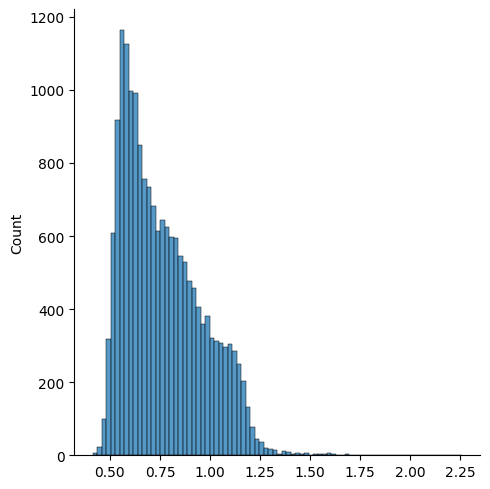

In [14]:
import seaborn as sns

sns.displot(gene_rmse)

In [15]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Scaffolds import MurckoScaffold

print(Chem.MolToMolBlock(Chem.MolFromSmiles('C1CCC1')))


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



NC(=O)Nc1sc(-c2ccc(F)cc2)cc1C(N)=O


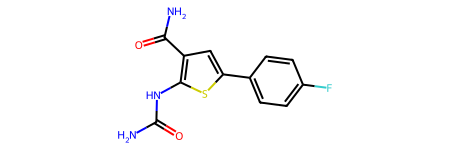

In [16]:
smiles = raw_de_train.SMILES[0]
print(smiles)
m = Chem.MolFromSmiles(smiles)
m

c1ccc(-c2cccs2)cc1


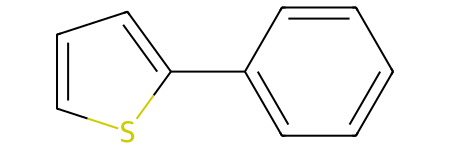

In [17]:
sub = MurckoScaffold.GetScaffoldForMol(m)
print(Chem.MolToSmiles(sub))

sub

In [18]:
mols = raw_de_train.SMILES.apply(Chem.MolFromSmiles)

In [19]:
''.startswith

<function str.startswith>

/Users/broxoli/.venv-torch/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (614). n_quantiles is set to n_samples.
  warnings.warn(
/var/folders/8y/5694n0_n42j4fmg6d5j411480000gn/T/ipykernel_21685/586803485.py:42: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


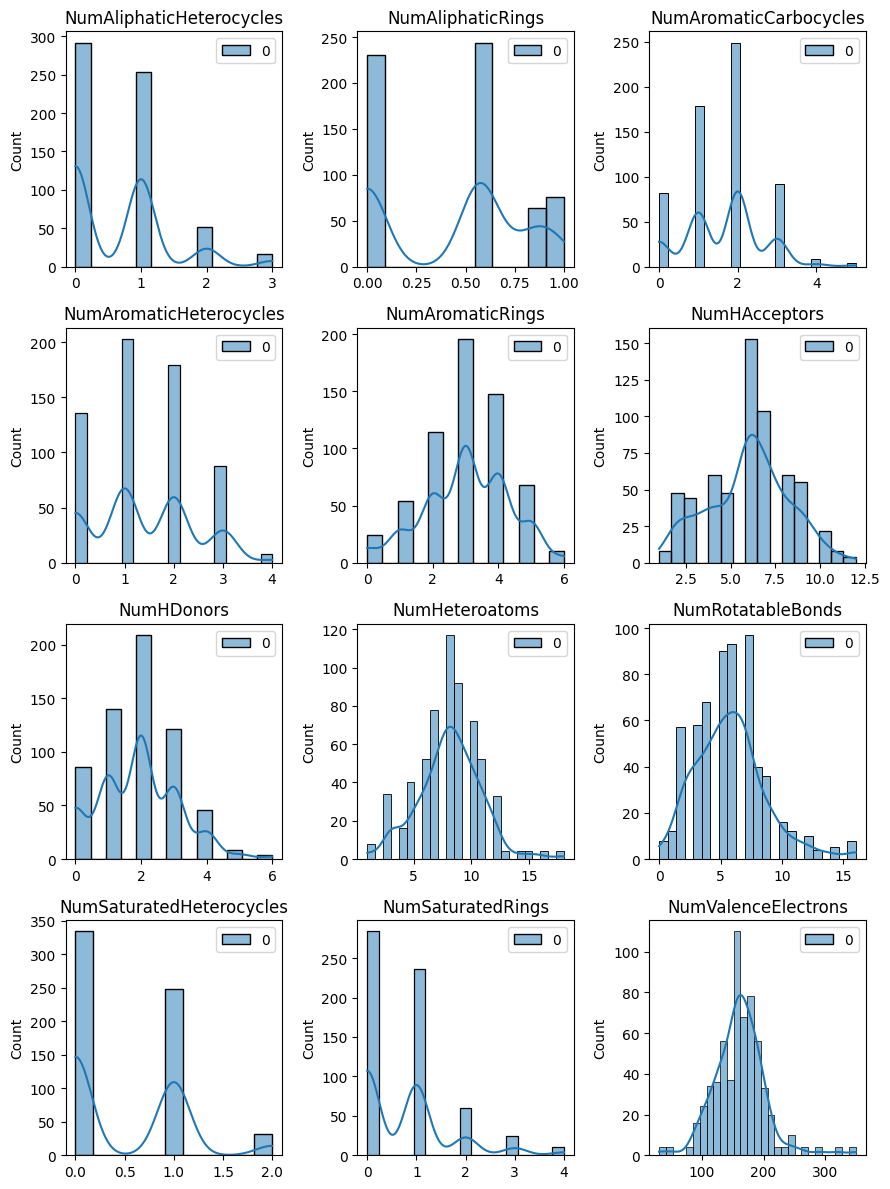

In [46]:
import seaborn as sns

from sklearn import preprocessing

# qm = Chem.RWMol(mols[0])

# print(qm.GetRingInfo())
# dir(qm.GetRingInfo())

# props = list(filter(lambda name: name.startswith('Num'), dir(Descriptors)))
# MOL_DESCRIPTORS = [
#     'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings',
#     'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings',
#     'NumHAcceptors', 'NumHDonors',
#     'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds',
#     'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
#     'NumValenceElectrons'
# ]
MOL_DESCRIPTORS = [
    'NumAliphaticHeterocycles', 'NumAliphaticRings',
    'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings',
    'NumHAcceptors', 'NumHDonors',
    'NumHeteroatoms', 'NumRotatableBonds',
    'NumSaturatedHeterocycles', 'NumSaturatedRings',
    'NumValenceElectrons'
]

def show_props(props, mol):
    for p in props:
        print(f'{p}\t\t\t\t{getattr(Descriptors, p)(mol)}')

def show_prop_distribution(props, mols, scalers={}):
    fig, axes = make_grid_plot(len(props))

    for idx, p in enumerate(props):
        values = np.reshape(mols.apply(getattr(Descriptors, p)), (len(mols), 1))
        if scalers.get(p) is not None:
            values = scalers[p].fit_transform(values)
        sns.histplot(values, kde=True, ax=axes[idx])
        axes[idx].set_title(p)
    
    fig.tight_layout()

# show_props(MOL_DESCRIPTORS[:1], mols[0:10])
show_prop_distribution(MOL_DESCRIPTORS, mols, scalers={
        'NumAliphaticRings': preprocessing.QuantileTransformer()
    }
)
# print(
#     Descriptors.NOCount(mols[0]), Descriptors.NumAliphaticRings(mols[0]), Descriptors.NumAromaticRings(mols[0]), Descriptors.NumHAcceptors(mols[0]),

# )

In [ ]:
# mols.apply(Descriptors.NumAromaticRings).hist()

# mols.apply(Descriptors.NumAliphaticRings).hist()

from rdkit.Chem.Fingerprints.FingerprintMols import FingerprintsFromMols
from rdkit.Chem.Fingerprints.FingerprintMols import FingerprintMol, GetRDKFingerprint
# mols[0]
# FingerprintMol(mols[0]).GetNumBits()
# len(FingerprintMol(mols[0]).ToBitString())
GetRDKFingerprint(mols[0])


# type(mols[0])
# mols[0]
# dir(FingerprintMol(mols[0]))

[15:18:07] No core matches


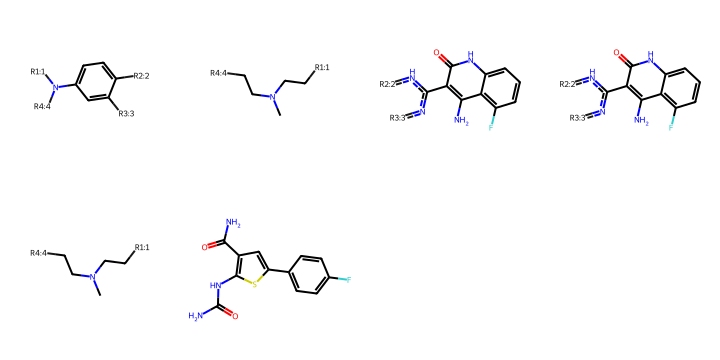

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdRGroupDecomposition
s = Chem.MolFromSmarts('*Nc1ccc(*)cc1')

gs, _ = rdRGroupDecomposition.RGroupDecompose([s], mols[:2])


display(Chem.Draw.MolsToGridImage([*gs[0].values(), mols[0]], subImgSize=(180,180), molsPerRow=4))

Descriptors.NumAliphaticRings(mols[0])=0
Descriptors.NumAromaticRings(mols[0])=2


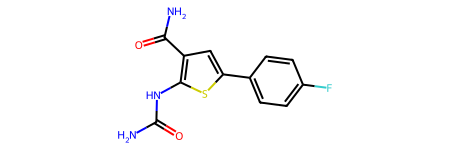

In [ ]:
# for ms in mols:
#     print(Chem.MolToSmiles(ms), ms.HasSubstructMatch(Chem.MolFromSmiles('c1ccccc1')))

# Chem.FindMolChiralCenters(mols[0])

print(
    f'{Descriptors.NumAliphaticRings(mols[0])=}'
    f'\n{Descriptors.NumAromaticRings(mols[0])=}'
)

mols[0]
# mols[0].HasSubstructMatch(mols[1])

[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[15:44:46] No core matches
[

,Mol,Core,R1,R2,R3,R4,R5,R6
1,,,,,,,,
4,,,,,,,,
5,,,,,,,,
6,,,,,,,,
13,,,,,,,,
...,...,...,...,...,...,...,...,...
598,,,,,,,,
599,,,,,,,,
600,,,,,,,,
608,,,,,,,,

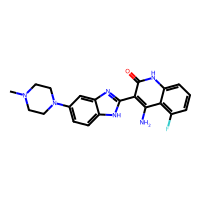
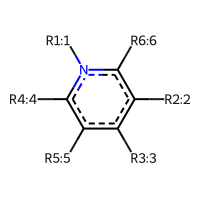
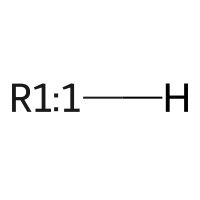
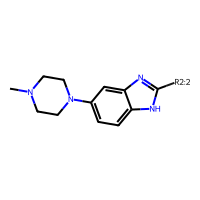
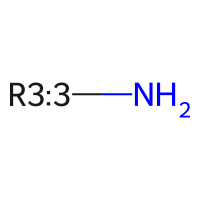
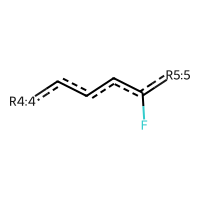
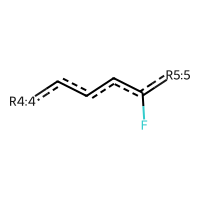
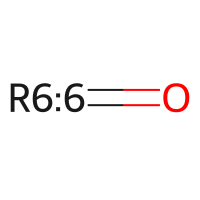
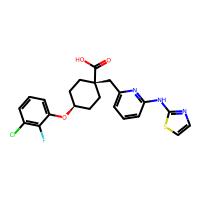
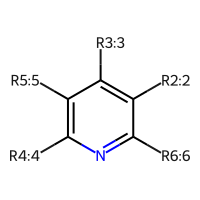
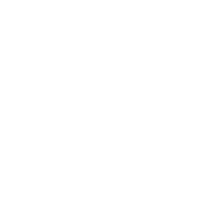
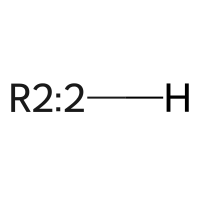
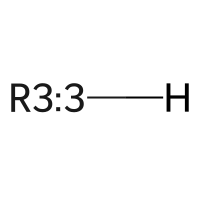
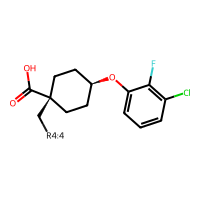
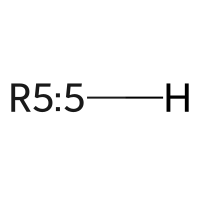
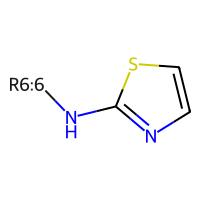
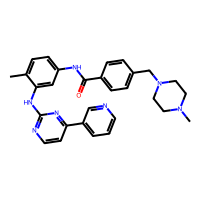
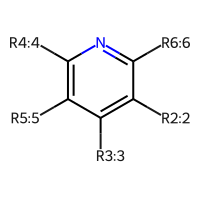
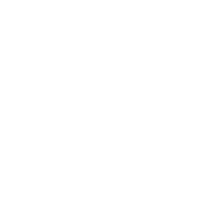
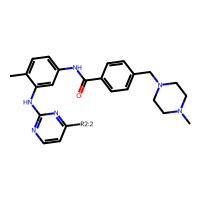
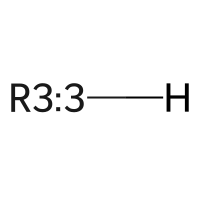
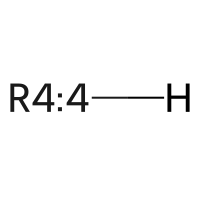
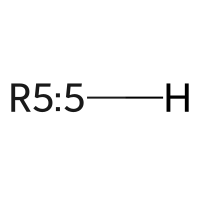
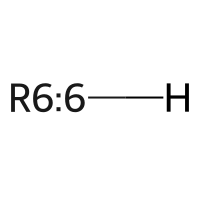
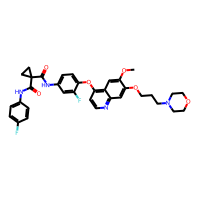
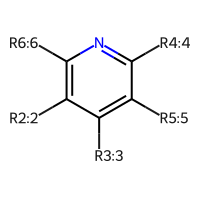
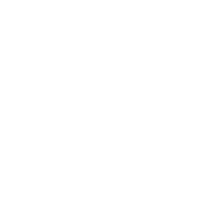
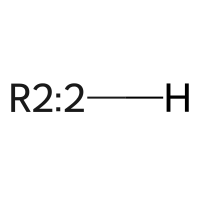
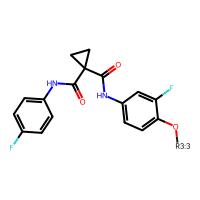
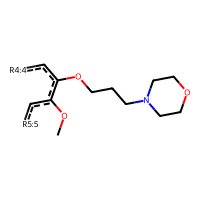
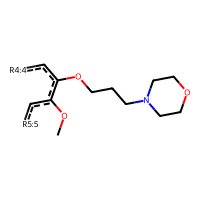
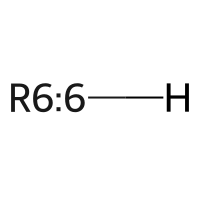
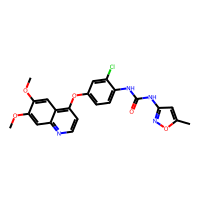
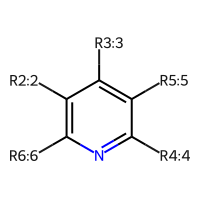
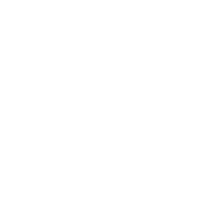
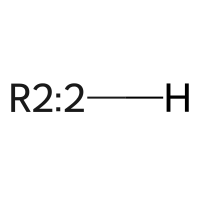
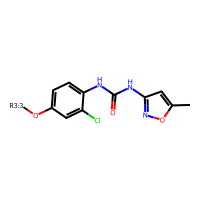
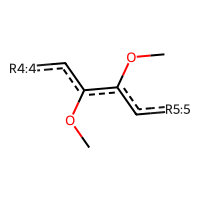
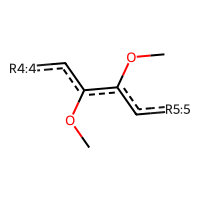
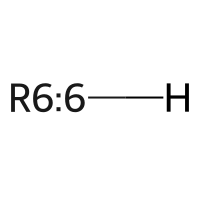
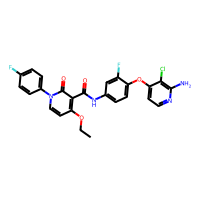
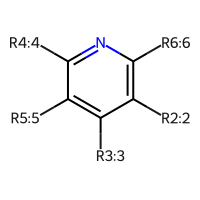
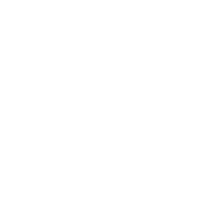
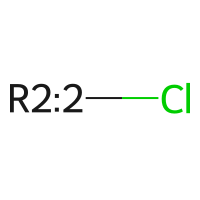
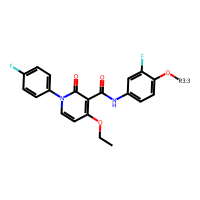
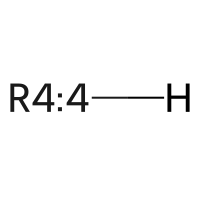
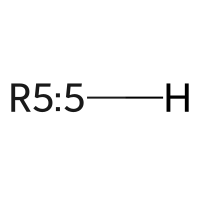
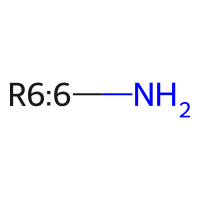
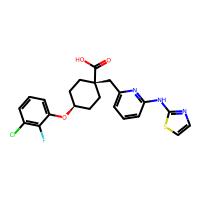
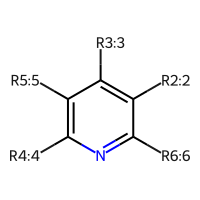
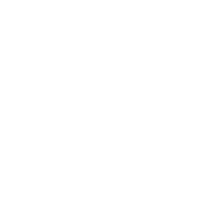
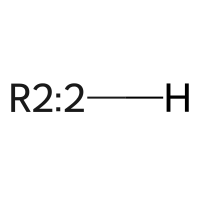
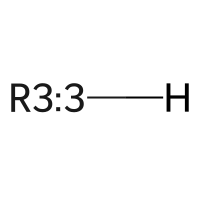
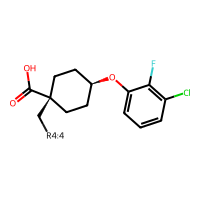
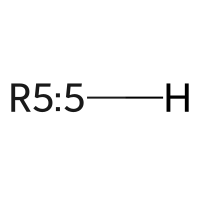
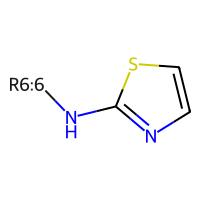
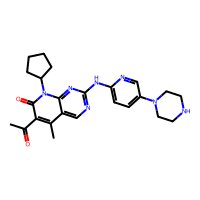
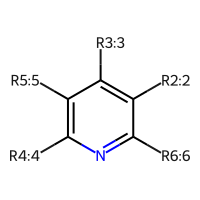
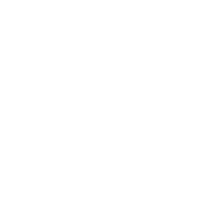
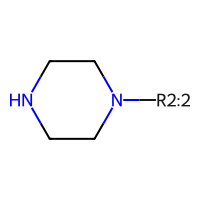
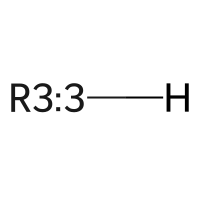
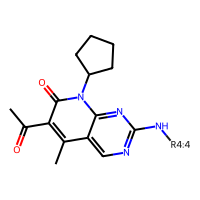
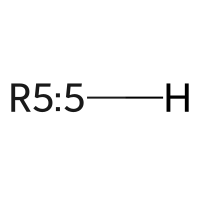
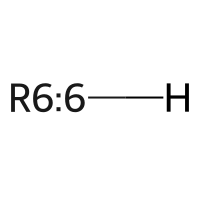
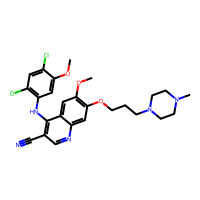
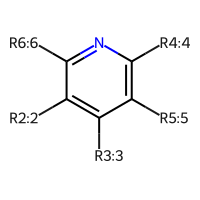
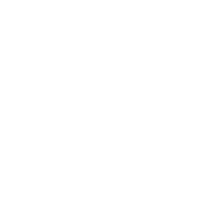
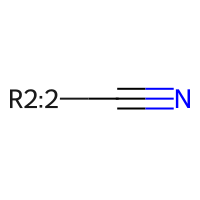
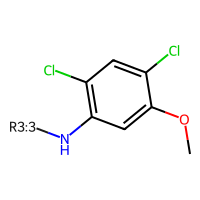
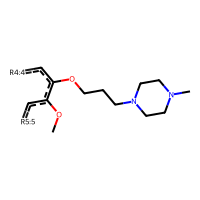
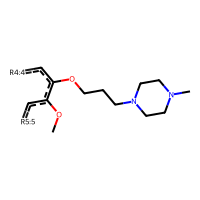
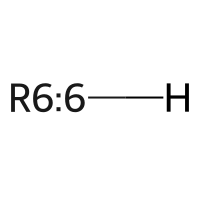
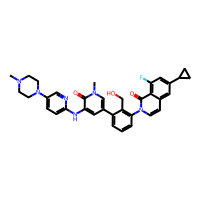
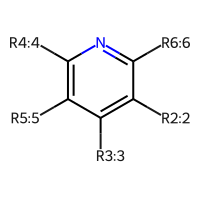
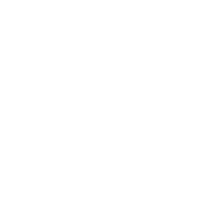
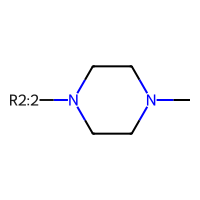
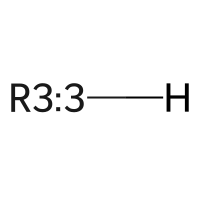
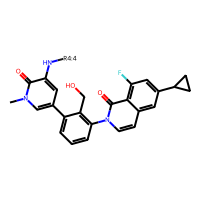
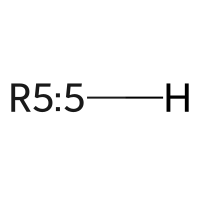
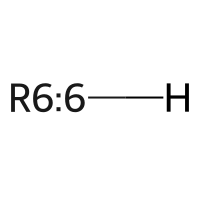

Failed: 401
Successful Decomposition: 213


In [ ]:
from rdkit.Chem import PandasTools

def chem_decompose(smiles, mols):
    core = Chem.MolFromSmiles(smiles)
    groups, failed = rdRGroupDecomposition.RGroupDecompose(core, mols, asRows=False)

    successful = list(set(range(len(mols))).difference(failed))
    display(
        PandasTools.RGroupDecompositionToFrame(groups, mols[successful], include_core=True)
    )

    print(f'Failed: {len(failed)}')
    return successful


# # core = Chem.MolFromSmiles('c1ccccc1')
# core = Chem.MolFromSmiles('c1c([*:2])c([*:3])ccn1')
# smiles = 'c1c([*:2])c([*:3])ccn1'
smiles = 'c1c([*:2])c([*:3])ccn1'
successful = chem_decompose(smiles, mols)

print(f'Successful Decomposition: {len(successful)}')

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Scaffolds import MurckoScaffold

def compute_smile_groups(data):
    mols = data.SMILES.apply(Chem.MolFromSmiles)
    data['aromatic_rings'] = mols.apply(Descriptors.NumAromaticRings)
    data['aliphatic_rings'] = mols.apply(Descriptors.NumAliphaticRings)

    return data, ['aromatic_rings', 'aliphatic_rings']

compute_smile_groups(raw_de_train)

(              cell_type       sm_name sm_lincs_id  \
 0    T regulatory cells        TPCA-1    LSM-1136   
 1              NK cells     Dovitinib    LSM-1127   
 2    T regulatory cells    Tacalcitol   LSM-45518   
 3    T regulatory cells  Atorvastatin    LSM-5771   
 4          T cells CD8+       MK-5108   LSM-36812   
 ..                  ...           ...         ...   
 609  T regulatory cells    Raloxifene    LSM-3425   
 610            NK cells    Dabrafenib    LSM-6303   
 611  T regulatory cells        RN-486   LSM-47132   
 612            NK cells   Doxorubicin    LSM-4062   
 613        T cells CD8+  Ricolinostat    LSM-6324   
 
                                                 SMILES  control      A1BG  \
 0                   NC(=O)Nc1sc(-c2ccc(F)cc2)cc1C(N)=O    False  2.175274   
 1    CN1CCN(c2ccc3[nH]c(-c4c(N)c5c(F)cccc5[nH]c4=O)...    False  0.214531   
 2    C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]([C@H](C)CC[C@...    False  0.391257   
 3    CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccc

[1, 2, 3, 4]